In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("svm_dataset.csv")
df.head(8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,193,50,16,375,25.9,0.655,24,0
1,11,155,76,28,150,33.3,1.353,51,1
2,3,191,68,15,130,30.9,0.299,34,0
3,3,141,0,0,0,30.0,0.761,27,1
4,4,95,70,32,0,32.1,0.612,24,0
5,3,142,80,15,0,32.4,0.200,63,0
6,4,123,62,0,0,32.0,0.226,35,1
7,5,96,74,18,67,33.6,0.997,43,0


In [6]:
seker_hastalari = df[df.Outcome == 1]
saglikli_insanlar = df[df.Outcome == 0]

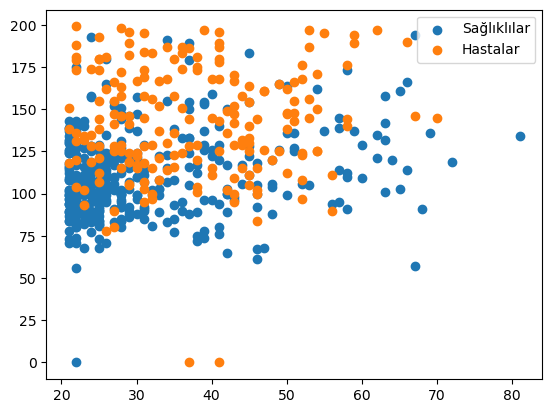

In [7]:
plt.scatter(saglikli_insanlar.Age,saglikli_insanlar.Glucose, label = "Sağlıklılar" )
plt.scatter(seker_hastalari.Age, seker_hastalari.Glucose, label = "Hastalar")
plt.xlabel = "Age"
plt.ylabel = "Glucose"
plt.legend()

In [8]:
y = df.Outcome.values
x_orijinal = df.drop(["Outcome"], axis = 1)

In [9]:
# NORMALİZATİON
x = (x_orijinal - np.min(x_orijinal))/ (np.max(x_orijinal)- np.min(x_orijinal))

In [10]:
x.head # Normalize sonrası x değerleri

<bound method NDFrame.head of      Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.001182  0.228132       0.059102       0.018913  0.443262  0.030615   
1       0.013002  0.183215       0.089835       0.033097  0.177305  0.039362   
2       0.003546  0.225768       0.080378       0.017730  0.153664  0.036525   
3       0.003546  0.166667       0.000000       0.000000  0.000000  0.035461   
4       0.004728  0.112293       0.082742       0.037825  0.000000  0.037943   
..           ...       ...            ...            ...       ...       ...   
562     0.005910  0.104019       0.078014       0.024823  0.027187  0.028842   
563     0.009456  0.208038       0.106383       0.040189  0.354610  0.039835   
564     0.008274  0.177305       0.078014       0.049645  0.404255  0.041017   
565     0.001182  0.086288       0.059102       0.011820  0.000000  0.027187   
566     0.008274  0.221040       0.080378       0.046099  0.359338  0.044563   

     Diab

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 3)

In [12]:
from sklearn.svm import SVC
model = SVC(random_state = 3)
model.fit(x_train,y_train)

SVC(random_state=3)

In [13]:
lst = [7,128,71,34,0,35.6,0.617,50]
arr = np.array([lst])

In [14]:
new_df = pd.DataFrame(arr)
new_df

,0,1,2,3,4,5,6,7
0,7.0,128.0,71.0,34.0,0.0,35.6,0.617,50.0


In [15]:
model.predict(new_df)

C:\Users\hilal\anaconda3\envs\Hilal\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

**Modelimizin başarı yüzdesine bakalım**

In [17]:
(model.score(x_test,y_test))*100

73.68421052631578